In [1]:
from lms2.electric.batteries import Battery
from lms2.electric.sources import PowerSource
from lms2.core.models import LModel
from lms2.core.time import Time

from pyomo.environ import Objective, SolverFactory, TransformationFactory
from pyomo.dae.contset import ContinuousSet

import matplotlib
import matplotlib.pyplot as plt
from lms2.base.utils import pplot
import pandas as pd

matplotlib.use('Agg')


keywords are unexpanded, not using


/home/admin/Documents/02-Recherche/02-Python/lms2/venv/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  


In [2]:

model = LModel(name='model')
time = Time('00:00:00', '00:10:00', freq='10s')
time.nfe = int(time.delta/time.dt)
model.t = ContinuousSet(bounds=(time.timeSteps[0], time.timeSteps[-1]))

model.bat1 = Battery(time=model.t, e0=500.0, emin=0.0, emax=1000, etac=0.9, etad=0.8, pcmax=10000, pdmax=10000)
source = pd.Series({0.0: 0.0, 60: -0.5, 300: 1, 400: -1, 600: 0.5})
model.ps = PowerSource(time=model.t, profile=source, flow_name='p')
model.connect_flux(model.bat1.p, model.ps.p)


def _obj(m):
    return 0


model.obj = Objective(rule=_obj)
discretizer = TransformationFactory('dae.finite_difference')
discretizer.apply_to(model, nfe=time.nfe)  # BACKWARD or FORWARD

opt = SolverFactory('glpk')
results = opt.solve(model)


    solver failure.


/home/admin/Documents/02-Recherche/02-Python/lms2/venv/lib/python3.6/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


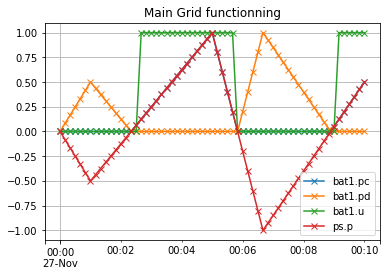

In [3]:
l, a, f = pplot(model.bat1.pc, model.bat1.pd, model.bat1.u, model.ps.p, index = time.datetime, legend=True,
                title='Main Grid functionning', Marker='x')
f.show()
plt.gca().grid(True)